# Работа с базой данных из Python
Ранее в курсе мы познакомились с основами SQL (язык запросов к базам данных) и Python (язык программирования). Возможно, у вас возникал вопрос: можно ли объединить два этих механизма? Можно ли работать с базами данных и выполнять SQL-запросы средствами Python? И если можно, то как это сделать?
В курсе для удобства работы с данными мы использовали Metabase. Однако Metabase — это не сама база данных, а BI-инструмент, то есть удобный интерфейс для взаимодействия с данными, которые хранятся в БД, построения отчётов и графиков. Всё это время наши данные хранились под управлением СУБД PostgreSQL, а обращались мы к ним через запросы в Metabase.
В реальной деятельности дата-сайентисту требуется не только писать запрос к данным, но и затем обрабатывать его результаты с помощью Python. Для решения таких задач требуется некоторое средство, которое будет связывать Python и PostgreSQL так, чтобы мы могли с помощью Python отправлять запросы в Postgres и принимать оттуда результаты.
Именно таким средством является пакет psycopg2, о котором мы сейчас и поговорим.

Теперь посмотрим, как можно подключиться к нашей базе и выполнять запросы из Jupyter-ноутбука.

Для подключения нам потребуются следующие данные:

* dbname — название базы, к которой нужно подключиться;
* user — имя пользователя в СУБД;
* password — пароль;
* host — адрес, по которому нужно подключиться;
* port — порт, к которому нужно подключиться (по умолчанию равен 5432).

In [3]:
# Для нашей базы эти параметры такие:
DBNAME = 'skillfactory'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [ ]:
import psycopg2
import pandas as pd
# Создаём соединение с заданными параметрами:
connection = psycopg2.connect(
   dbname=DBNAME,
   user=USER,
   host=HOST,
   password=PASSWORD,
   port=PORT
)

In [5]:
# код запроса представляет из себя строковую переменную
n = 10
query = f'''select *
           from sql.pokemon
           limit {n}
        '''
# лучше использовать f-строки — так удобнее передавать параметры

In [6]:
# используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
df = pd.read_sql_query(query, connection)
df

C:\Users\vladi\AppData\Local\Temp\ipykernel_8968\2473184231.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,id,name,type1,type2,hp,attack,defense,speed
0,1,Bulbasaur,Grass,Poison,45,49,49,45
1,2,Ivysaur,Grass,Poison,60,62,63,60
2,3,Venusaur,Grass,Poison,80,82,83,80
3,4,VenusaurMega Venusaur,Grass,Poison,80,100,123,80
4,7,Charizard,Fire,Flying,78,84,78,100
5,8,CharizardMega Charizard X,Fire,Dragon,78,130,111,100
6,9,CharizardMega Charizard Y,Fire,Flying,78,104,78,100
7,16,Butterfree,Bug,Flying,60,45,50,70
8,17,Weedle,Bug,Poison,40,35,30,50
9,18,Kakuna,Bug,Poison,45,25,50,35


In [7]:
# не забываем закрыть соединение после окончания работы
connection.close()

# 2. Введение. Знакомство с данными
Представьте, что вы устроились на работу в кадровое агентство, которое подбирает вакансии для IT-специалистов. Ваш первый проект — создание модели машинного обучения, которая будет рекомендовать вакансии клиентам агентства, претендующим на позицию Data Scientist. Сначала вам необходимо понять, что из себя представляют данные и насколько они соответствуют целям проекта. В литературе эта часть работы над ML-проектом называется Data Understanding, или анализ данных.

Наш проект включает в себя несколько этапов:
* знакомство с данными;
* предварительный анализ данных;
* детальный анализ вакансий;
* анализ работодателей;
* предметный анализ.
Каждая из частей будет состоять из блока практических заданий, которые вам необходимо выполнить в своих Jupyter-ноутбуках, и контрольных вопросов на платформе, которые проверяются автоматически.

Также вам предстоит отправить свой код ментору для код-ревью. Вам будет предоставлен ноутбук-шаблон и требования, согласно которым вы должны оформить своё решение.


Требования к оформлению ноутбука-решения:

* Решение оформляется только в Jupyter Notebook.
* Решение оформляется в соответствии с ноутбуком-шаблоном.
* Каждое задание выполняется в отдельной ячейке, выделенной под задание (в шаблоне они помечены как ваш код здесь). Не следует создавать много ячеек для решения задачи — это провоцирует неудобства при проверке.
* Текст SQL-запросов и код на Python должны быть читаемыми. Не забывайте про отступы в SQL-коде.
* Выводы по каждому этапу оформляются в формате Markdown в отдельной ячейке (в шаблоне они помечены как ваши выводы здесь).
* Выводы можно дополнительно проиллюстрировать с помощью графиков. Они оформляются в соответствии с теми правилами, которые мы приводили в модуле по визуализации данных.
* Не забудьте удалить ячейку с данными соединения перед фиксацией работы в GitHub.
## Знакомство с данными
Все необходимые таблицы находятся в схеме public базы данных project_sql (именно эту базу вам необходимо указать в параметре dbname при подключении).
То есть параметры подключения будут следующими:

In [8]:
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

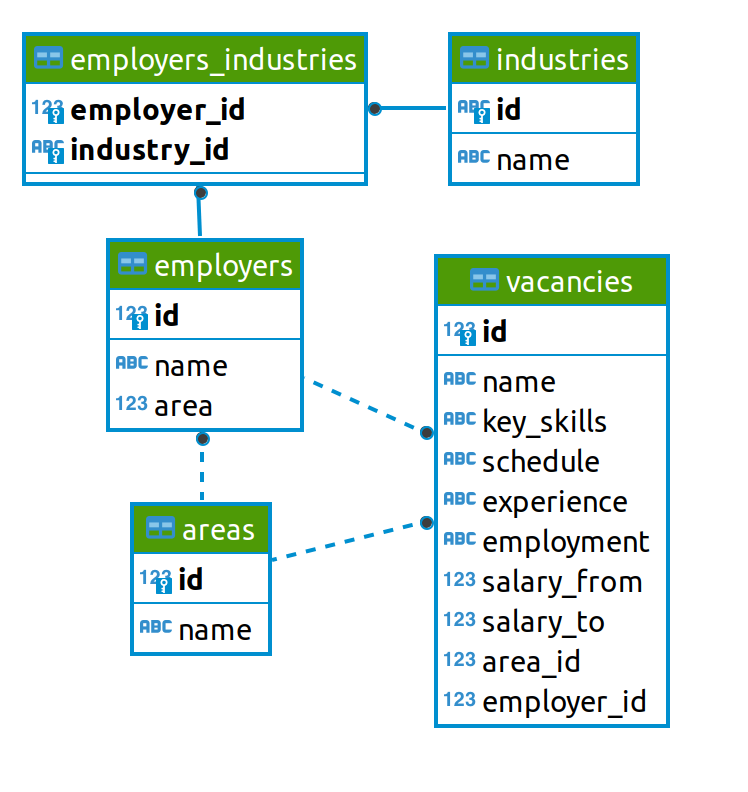

Познакомимся с каждой таблицей. 
### Vacancies
Таблица хранит в себе данные по вакансиям и содержит следующие столбцы:
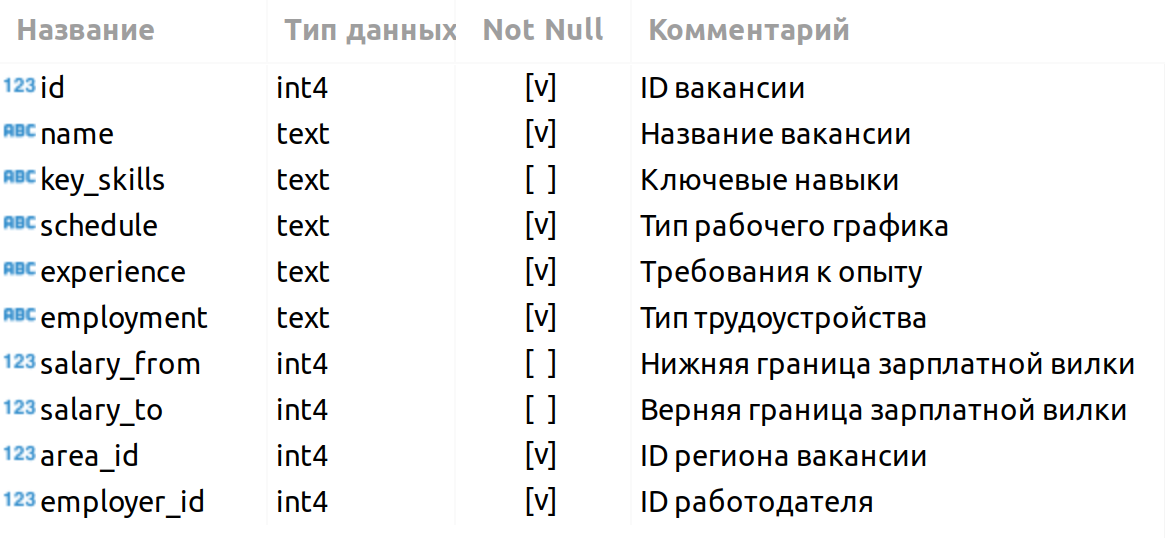

Зарплатная вилка — это верхняя и нижняя граница оплаты труда в рублях (зарплаты в других валютах уже переведены в рубли). Соискателям она показывает, в каком диапазоне компания готова платить сотруднику на этой должности.

### Areas
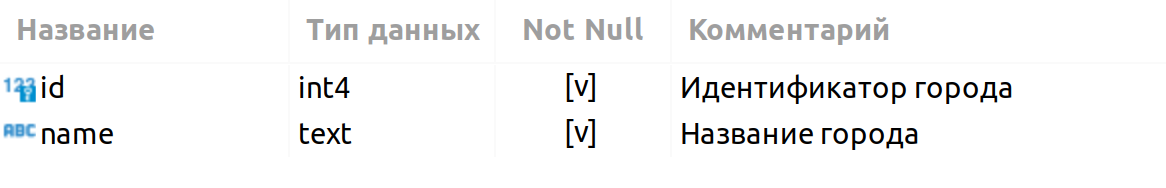

### Employers
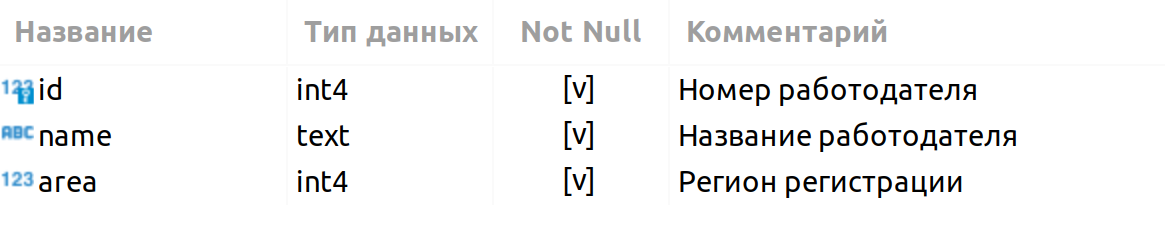

### Industries
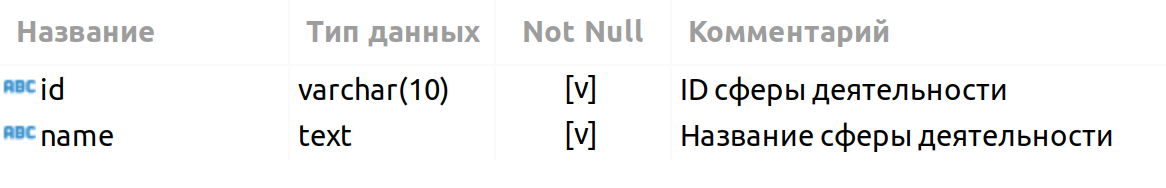

### employers_industries 
Дополнительная таблица, которая существует для организации связи между работодателями и сферами их деятельности.

Эта таблица нужна нам, поскольку у одного работодателя может быть несколько сфер деятельности (или работодатели могут вовсе не указать их). Для удобства анализа необходимо хранить запись по каждой сфере каждого работодателя в отдельной строке таблицы.
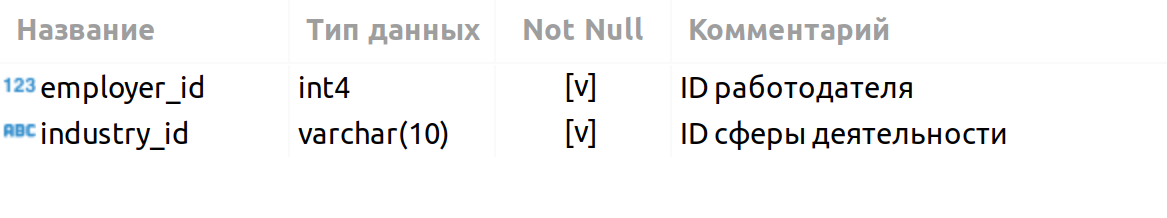